In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal

In [3]:
file_path = "/res.xlsx"
df = pd.read_excel(file_path)

/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
#mapping of columns for identifying question + hypothesis
temp_map_i = {
    "D1I_1": 0.001, "D1I_2": 0.5, "D1I_3": 1.0,
    "D2I_1": 0.5, "D2I_2": 1.0, "D2I_3": 0.001,
    "D3I_1": 1.0, "D3I_2": 0.001, "D3I_3": 0.5
}

i_cols = list(temp_map_i.keys())

temp_0001 = []
temp_05 = []
temp_1 = []

# Group values based on actual temperature
for col in i_cols:
    temp = temp_map_i[col]
    if temp == 0.001:
        temp_0001.extend(df[col].dropna().tolist())
    elif temp == 0.5:
        temp_05.extend(df[col].dropna().tolist())
    elif temp == 1.0:
        temp_1.extend(df[col].dropna().tolist())

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(temp_0001, temp_05, temp_1)

print("Kruskal-Wallis H-statistic:", statistic)
print("P-value:", p_value)

Kruskal-Wallis H-statistic: 0.011891725023071485
P-value: 0.9940717791466913


In [5]:
#testing for h1: data retention and context presevation
# Load your Excel file
# Mapping of column names to true temperature values
temp_map_cp = {
    "D1CP_1": 0.001, "D1CP_2": 0.5, "D1CP_3": 1.0,
    "D2CP_1": 0.5, "D2CP_2": 1.0, "D2CP_3": 0.001,
    "D3CP_1": 1.0, "D3CP_2": 0.001, "D3CP_3": 0.5
}

temp_map_dr = {
    "D1DR_1": 0.001, "D1DR_2": 0.5, "D1DR_3": 1.0,
    "D2DR_1": 0.5, "D2DR_2": 1.0, "D2DR_3": 0.001,
    "D3DR_1": 1.0, "D3DR_2": 0.001, "D3DR_3": 0.5
}

# Combine all columns from both question types
combined_map = {**temp_map_cp, **temp_map_dr}
combined_cols = list(combined_map.keys())

# Separate values by temperature
temp_0001 = []
temp_05 = []
temp_1 = []

for col in combined_cols:
    temp = combined_map[col]
    if temp == 0.001:
        temp_0001.extend(df[col].dropna().tolist())
    elif temp == 0.5:
        temp_05.extend(df[col].dropna().tolist())
    elif temp == 1.0:
        temp_1.extend(df[col].dropna().tolist())

# Run Kruskal-Wallis test
statistic, p_value = kruskal(temp_0001, temp_05, temp_1)

print("Kruskal-Wallis H-statistic:", statistic)
print("P-value:", p_value)

Kruskal-Wallis H-statistic: 5.191227109382095
P-value: 0.07460009079432578


In [6]:
# Mapping of column names to actual temperature values for the Consistency question
temp_map_c = {
    "D1C_1": 0.001, "D1C_2": 0.5, "D1C_3": 1.0,
    "D2C_1": 0.5, "D2C_2": 1.0, "D2C_3": 0.001,
    "D3C_1": 1.0, "D3C_2": 0.001, "D3C_3": 0.5
}

# Separate values into three temperature groups
temp_0001 = []
temp_05 = []
temp_1 = []

# Distribute values based on their true temperature
for col, temp in temp_map_c.items():
    if temp == 0.001:
        temp_0001.extend(df[col].dropna().tolist())
    elif temp == 0.5:
        temp_05.extend(df[col].dropna().tolist())
    elif temp == 1.0:
        temp_1.extend(df[col].dropna().tolist())

# Run Kruskal-Wallis test
statistic, p_value = kruskal(temp_0001, temp_05, temp_1)

print("Kruskal-Wallis H-statistic:", statistic)
print("P-value:", p_value)

Kruskal-Wallis H-statistic: 0.14430711743691796
P-value: 0.9303880156498865


Privacy mappings


In [ ]:
P1_map = {
    "I never review or adjust them": 1,
    "I only check them when I create a new account": 2,
    "I review them occasionally, but I don’t always change them": 3,
    "I regularly review and adjust them based on my preferences": 4,
    "I always ensure the highest level of privacy settings available": 5
}

P2_map = {
    "I accept all cookies without checking": 1,
    "I accept only essential cookies when possible": 2,
    "I review the options and customize what I allow": 3,
    "I reject all cookies whenever I can": 4,
    "I use browser extensions or settings to block cookies automatically": 5
}

P3_map = {
    "I accept them without reading": 1,
    "I skim through them briefly before accepting": 2,
    "I look for specific sections (e.g., privacy policy) before accepting": 3,
    "I carefully read them before deciding": 4,
    "I research the service’s privacy practices before signing up": 5
}

In [ ]:
df["P1_score"] = df["P1"].map(P1_map)
df["P2_score"] = df["P2"].map(P2_map)
df["P3_score"] = df["P3"].map(P3_map)

In [ ]:
df["composite_score"] = (df["P1_score"] + df["P2_score"] + df["P3_score"]) / 3

In [ ]:
def classify_privacy(score):
    if score < 2.67:
        return "Low Privacy Conscious"
    elif score <= 3.33:
        return "Medium Privacy Conscious"
    else:
        return "High Privacy Conscious"

In [ ]:
df["privacy_classification"] = df["composite_score"].apply(classify_privacy)

In [ ]:
privacy_counts = df["privacy_classification"].value_counts()
privacy_counts

,count
privacy_classification,
Low Privacy Conscious,34
High Privacy Conscious,11
Medium Privacy Conscious,6


Datset mappings


In [ ]:
cp_map = {
    "Not Preserved at All": 1,
    "Slightly Preserved": 2,
    "Somewhat Preserved": 3,
    "Moderately Well Preserved": 4,
    "Very Well Preserved": 5
}

i_map = {
    "Not successful at All": 1,
    "Slightly successful": 2,
    "Somewhat successful": 3,
    "Quite successful": 4,
    "Very successful": 5
}

c_map = {
    "Not Consistent at All": 1,
    "Slightly Consistent": 2,
    "Somewhat Consistent": 3,
    "Moderately Consistent": 4,
    "Very Consistent": 5
}

dr_map = {
    "Not Balanced at All": 1,
    "Slightly Balanced": 2,
    "Somewhat Balanced": 3,
    "Moderately Well Balanced": 4,
    "Very Well Balanced": 5
}

co_map = {
    "Setting X": 1,
    "Setting Y": 2,
    "Setting Z": 3,
    "Indifferent (I do not perceive a difference between the settings)": 4
}

In [ ]:
cp_cols = ["D1CP_1", "D1CP_2", "D1CP_3",
           "D2CP_1", "D2CP_2", "D2CP_3",
           "D3CP_1", "D3CP_2", "D3CP_3"]

for col in cp_cols:
    df[col] = df[col].map(cp_map)

In [ ]:
i_cols = ["D1I_1", "D1I_2", "D1I_3",
          "D2I_1", "D2I_2", "D2I_3",
          "D3I_1", "D3I_2", "D3I_3"]

for col in i_cols:
    df[col] = df[col].map(i_map)

In [ ]:
c_cols = ["D1C_1", "D1C_2", "D1C_3",
          "D2C_1", "D2C_2", "D2C_3",
          "D3C_1", "D3C_2", "D3C_3"]

for col in c_cols:
    df[col] = df[col].map(c_map)

In [ ]:
dr_cols = ["D1DR_1", "D1DR_2", "D1DR_3",
           "D2DR_1", "D2DR_2", "D2DR_3",
           "D3DR_1", "D3DR_2", "D3DR_3"]

for col in dr_cols:
    df[col] = df[col].map(dr_map)

In [ ]:
df["X_CP_Avg"] = (df["D1CP_1"] + df["D2CP_3"] + df["D3CP_2"]) / 3
df["Y_CP_Avg"] = (df["D1CP_2"] + df["D2CP_1"] + df["D3CP_3"]) / 3
df["Z_CP_Avg"] = (df["D1CP_3"] + df["D2CP_2"] + df["D3CP_1"]) / 3

# I averages:
df["X_I_Avg"] = (df["D1I_1"] + df["D2I_3"] + df["D3I_2"]) / 3
df["Y_I_Avg"] = (df["D1I_2"] + df["D2I_1"] + df["D3I_3"]) / 3
df["Z_I_Avg"] = (df["D1I_3"] + df["D2I_2"] + df["D3I_1"]) / 3

# C averages:
df["X_C_Avg"] = (df["D1C_1"] + df["D2C_3"] + df["D3C_2"]) / 3
df["Y_C_Avg"] = (df["D1C_2"] + df["D2C_1"] + df["D3C_3"]) / 3
df["Z_C_Avg"] = (df["D1C_3"] + df["D2C_2"] + df["D3C_1"]) / 3

# DR averages:
df["X_DR_Avg"] = (df["D1DR_1"] + df["D2DR_3"] + df["D3DR_2"]) / 3
df["Y_DR_Avg"] = (df["D1DR_2"] + df["D2DR_1"] + df["D3DR_3"]) / 3
df["Z_DR_Avg"] = (df["D1DR_3"] + df["D2DR_2"] + df["D3DR_1"]) / 3

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Prolific_ID_check,Q23_Browser,Q23_Version,Q23_Operating System,Q23_Resolution,P1,P2,P3,D1CP_1,D1CP_2,D1CP_3,D1I_1,D1I_2,D1I_3,D1C_1,D1C_2,D1C_3,D1DR_1,D1DR_2,D1DR_3,D1Co,D2CP_1,D2CP_2,D2CP_3,D2I_1,D2I_2,D2I_3,D2C_1,D2C_2,D2C_3,D2DR_1,D2DR_2,D2DR_3,D2Co,D3CP_1,D3CP_2,D3CP_3,D3I_1,D3I_2,D3I_3,D3C_1,D3C_2,D3C_3,D3DR_1,D3DR_2,D3DR_3,D3Co,PROLIFIC_PID,STUDY_ID,SESSION_ID,sectionsLeft,currSection,X_CP_Avg,Y_CP_Avg,Z_CP_Avg,X_I_Avg,Y_I_Avg,Z_I_Avg,X_C_Avg,Y_C_Avg,Z_C_Avg,X_DR_Avg,Y_DR_Avg,Z_DR_Avg
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,Recipient First Name,Recipient Email,External Data Reference,Location Latitude,Location Longitude,Distribution Channel,User Language,Please check your Prolific ID,Click to write the question text - Browser,Click to write the question text - Version,Click to write the question text - Operating S...,Click to write the question text - Resolution,How often do you review and adjust the privacy...,"If a website asks you to accept cookies, what ...","When signing up for a new online service, what...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Between the anonymised texts is there any text...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Between the anonymised texts is there any text...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Between the anonymised texts is there any text...,PROLIFIC_PID,STUDY_ID,SESSION_ID,sectionsLeft,currSection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-03-27 17:48:20,2025-03-27 17:50:57,IP Address,188.29.111.105,100,156,True,2025-03-27 17:50:57.383000,R_8InE3pVWKzcChm8,NaN,NaN,NaN,NaN,52.4867,-1.8989,anonymous,EN,67d9b516e827befa43fefe01,Chrome,134.0.0.0,Macintosh,2560x1440,I always ensure the highest level of privacy s...,I use browser extensions or settings to block ...,I research the service’s privacy practices bef...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,Setting Z,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,Indifferent (I do not perceive a difference be...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,Indifferent (I do not perceive a difference be...,67d9b516e827befa43fefe01,67e3f38875bf36d8448023bc,0vybv5rxst8,0,4,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.333333,4.333333,4.333333,4.333333,4.333333
2,2025-03-27 17:51:32,2025-03-27 17:52:47,IP Address,188.29.111.105,100,75,True,2025-03-27 17:52:48.120000,R_2rBc6hKKnwURAVN,NaN,NaN,NaN,NaN,52.4867,-1.8989,anonymous,EN,67d9b516e827befa43fefe01,Chrome,134.0.0.0,Macintosh,2560x1440,I regularly review and adjust them based on my...,I use browser extensions or settings to block ...,I research the service’s privacy practices bef...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,Indifferent (I do not perceive a difference be...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,Setting Z,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,Setting Y,67d9b516e827befa43fefe01,67e3f38875bf36d8448023bc,0vybv5rxst8,0,4,3.666667,3.666667,3.666667,3.666667,3.666667,3.666667,3.666667,3.666667,3.666667,3.666667,3.666667,3.666667
3,2025-03-27 17:57:03,2025-03-27 18:04:07,IP Address,82.132.238.215,100,423,True,2025-03-27 18:04:07.578000,R_8d6VNSnulJAVnl7,NaN,NaN,NaN,NaN,53.5464,-1.4307,anonymous,EN,5e96cbf9b1d496150ca1eb02,Opera,117.0.0.0,Windows NT 10.0,3840x2160,"I review them occasionally, but I don’t always...",I accept all cookies without checking,I accept them without reading,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,Indifferent (I do not perceive a difference be...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,Indifferent (I do not perceive a difference be...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,Indifferent (I do not perceive a difference be...,5

In [ ]:
# For CP: Compute composite score per participant
df["Final_CP"] = df[["X_CP_Avg", "Y_CP_Avg", "Z_CP_Avg"]].mean(axis=1)

# For I: Compute composite score per participant
df["Final_I"] = df[["X_I_Avg", "Y_I_Avg", "Z_I_Avg"]].mean(axis=1)

# For C: Compute composite score per participant
df["Final_C"] = df[["X_C_Avg", "Y_C_Avg", "Z_C_Avg"]].mean(axis=1)

# For DR: Compute composite score per participant
df["Final_DR"] = df[["X_DR_Avg", "Y_DR_Avg", "Z_DR_Avg"]].mean(axis=1)

In [ ]:
df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Prolific_ID_check,Q23_Browser,Q23_Version,Q23_Operating System,Q23_Resolution,P1,P2,P3,D1CP_1,D1CP_2,D1CP_3,D1I_1,D1I_2,D1I_3,D1C_1,D1C_2,D1C_3,D1DR_1,D1DR_2,D1DR_3,D1Co,D2CP_1,D2CP_2,D2CP_3,D2I_1,D2I_2,D2I_3,D2C_1,D2C_2,D2C_3,D2DR_1,D2DR_2,D2DR_3,D2Co,D3CP_1,D3CP_2,D3CP_3,D3I_1,D3I_2,D3I_3,D3C_1,D3C_2,D3C_3,D3DR_1,D3DR_2,D3DR_3,D3Co,PROLIFIC_PID,STUDY_ID,SESSION_ID,sectionsLeft,currSection,X_CP_Avg,Y_CP_Avg,Z_CP_Avg,X_I_Avg,Y_I_Avg,Z_I_Avg,X_C_Avg,Y_C_Avg,Z_C_Avg,X_DR_Avg,Y_DR_Avg,Z_DR_Avg,Final_CP,Final_I,Final_C,Final_DR
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,Recipient First Name,Recipient Email,External Data Reference,Location Latitude,Location Longitude,Distribution Channel,User Language,Please check your Prolific ID,Click to write the question text - Browser,Click to write the question text - Version,Click to write the question text - Operating S...,Click to write the question text - Resolution,How often do you review and adjust the privacy...,"If a website asks you to accept cookies, what ...","When signing up for a new online service, what...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Between the anonymised texts is there any text...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Between the anonymised texts is there any text...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Between the anonymised texts is there any text...,PROLIFIC_PID,STUDY_ID,SESSION_ID,sectionsLeft,currSection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-03-27 17:48:20,2025-03-27 17:50:57,IP Address,188.29.111.105,100,156,True,2025-03-27 17:50:57.383000,R_8InE3pVWKzcChm8,NaN,NaN,NaN,NaN,52.4867,-1.8989,anonymous,EN,67d9b516e827befa43fefe01,Chrome,134.0.0.0,Macintosh,2560x1440,I always ensure the highest level of privacy s...,I use browser extensions or settings to block ...,I research the service’s privacy practices bef...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,Setting Z,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,Indifferent (I do not perceive a difference be...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,Indifferent (I do not perceive a difference be...,67d9b516e827befa43fefe01,67e3f38875bf36d8448023bc,0vybv5rxst8,0,4,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.333333,4.333333,4.333333,4.333333,4.333333,4.000000,4.000000,4.222222,4.333333
2,2025-03-27 17:51:32,2025-03-27 17:52:47,IP Address,188.29.111.105,100,75,True,2025-03-27 17:52:48.120000,R_2rBc6hKKnwURAVN,NaN,NaN,NaN,NaN,52.4867,-1.8989,anonymous,EN,67d9b516e827befa43fefe01,Chrome,134.0.0.0,Macintosh,2560x1440,I regularly review and adjust them based on my...,I use browser extensions or settings to block ...,I research the service’s privacy practices bef...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,Indifferent (I do not perceive a difference be...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,Setting Z,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,Setting Y,67d9b516e827befa43fefe01,67e3f38875bf36d8448023bc,0vybv5rxst8,0,4,3.666667,3.666667,3.666667,3.666667,3.666667,3.666667,3.666667,3.666667,3.666667,3.666667,3.666667,3.666667,3.666667,3.666667,3.666667,3.666667
3,2025-03-27 17:57:03,2025-03-27 18:04:07,IP Address,82.132.238.215,100,423,True,2025-03-27 18:04:07.578000,R_8d6VNSnulJAVnl7,NaN,NaN,NaN,NaN,53.5464,-1.4307,anonymous,EN,5e96cbf9b1d496150ca1eb02,Opera,117.0.0.0,Windows NT 10.0,3840x2160,"I review them occasionally, but I don’t always...",I accept all cookies without checking,I accept them without reading,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,Indifferent (I do not perceive a difference be...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,Indifferent (I do not perce

In [ ]:
cols = [
    "X_CP_Avg", "Y_CP_Avg", "Z_CP_Avg",
    "X_I_Avg",  "Y_I_Avg", "Z_I_Avg",
    "X_C_Avg",  "Y_C_Avg", "Z_C_Avg",
    "X_DR_Avg", "Y_DR_Avg", "Z_DR_Avg"
]

overall_avgs = {col: df[col].mean() for col in cols}

In [ ]:
overall_avgs

{'X_CP_Avg': np.float64(4.02),
 'Y_CP_Avg': np.float64(4.006666666666667),
 'Z_CP_Avg': np.float64(3.733333333333333),
 'X_I_Avg': np.float64(4.0200000000000005),
 'Y_I_Avg': np.float64(3.9933333333333336),
 'Z_I_Avg': np.float64(3.9533333333333336),
 'X_C_Avg': np.float64(4.026666666666667),
 'Y_C_Avg': np.float64(4.080000000000001),
 'Z_C_Avg': np.float64(4.04),
 'X_DR_Avg': np.float64(3.8266666666666667),
 'Y_DR_Avg': np.float64(4.02),
 'Z_DR_Avg': np.float64(3.6266666666666665)}

In [ ]:
def get_co_counts(series):
    """Return a dictionary with counts for each response type."""
    counts = series.value_counts()
    return {
        "X": counts.get("Setting X", 0),
        "Y": counts.get("Setting Y", 0),
        "Z": counts.get("Setting Z", 0),
        "indifferent": counts.get("Indifferent (I do not perceive a difference between the settings)", 0)
    }

In [ ]:
d1_counts = get_co_counts(df["D1Co"])
d2_counts = get_co_counts(df["D2Co"])
d3_counts = get_co_counts(df["D3Co"])

# Now, if you want to store the counts for each category in separate variables per column,
# you could do something like this for D1Co:
X_D1 = d1_counts["X"]
Y_D1 = d1_counts["Y"]
Z_D1 = d1_counts["Z"]
indifferent_D1 = d1_counts["indifferent"]

# Similarly for D2Co:
X_D2 = d2_counts["Z"]
Y_D2 = d2_counts["X"]
Z_D2 = d2_counts["Y"]
indifferent_D2 = d2_counts["indifferent"]

# And for D3Co:
X_D3 = d3_counts["Y"]
Y_D3 = d3_counts["Z"]
Z_D3 = d3_counts["X"]
indifferent_D3 = d3_counts["indifferent"]

# Optionally, if you want to aggregate counts across the three columns (for an overall count):
X_total = X_D1 + X_D2 + X_D3
Y_total = Y_D1 + Y_D2 + Y_D3
Z_total = Z_D1 + Z_D2 + Z_D3
indifferent_total = indifferent_D1 + indifferent_D2 + indifferent_D3

In [ ]:
X_total

np.int64(22)

In [ ]:
Y_total

np.int64(21)

In [ ]:
Z_total

np.int64(25)

In [ ]:
indifferent_total

np.int64(47)

In [ ]:
import matplotlib.ticker as ticker

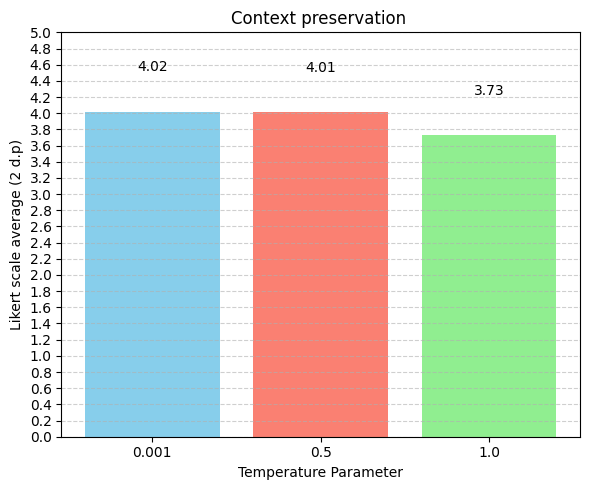

In [ ]:
#First graph for context preservation question
# Frequency data
freq_df = pd.DataFrame({
    'Temperature': ['0.001', '0.5', '1.0'],
    'Count': [4.02, 4.01, 3.73]
})

# Plot frequency bar chart
plt.figure(figsize=(6, 5))
plt.bar(freq_df['Temperature'], freq_df['Count'], color=['skyblue', 'salmon', 'lightgreen'])

plt.title('Context preservation ')
plt.xlabel('Temperature Parameter')
plt.ylabel('Likert scale average (2 d.p)')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for index, value in enumerate(freq_df['Count']):
    plt.text(index, value + 0.5, str(value), ha='center')

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.2))
plt.tight_layout()
plt.show()

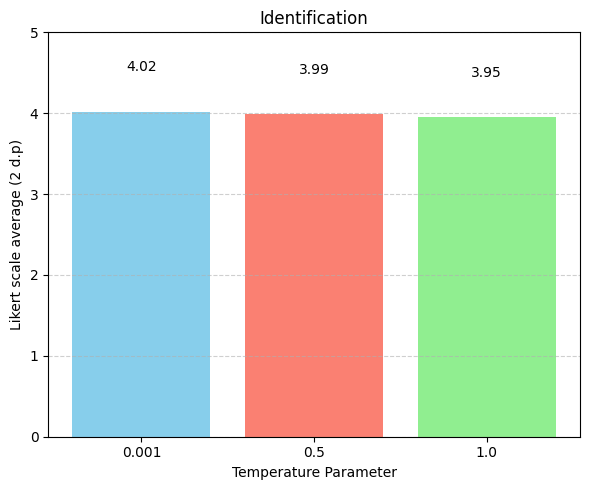

In [ ]:
#Second graph for identification question
# Frequency data
freq_df = pd.DataFrame({
    'Temperature': ['0.001', '0.5', '1.0'],
    'Count': [4.02, 3.99, 3.95]
})

# Plot frequency bar chart
plt.figure(figsize=(6, 5))
plt.bar(freq_df['Temperature'], freq_df['Count'], color=['skyblue', 'salmon', 'lightgreen'])

plt.title('Identification')
plt.xlabel('Temperature Parameter')
plt.ylabel('Likert scale average (2 d.p)')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for index, value in enumerate(freq_df['Count']):
    plt.text(index, value + 0.5, str(value), ha='center')

plt.tight_layout()
plt.show()

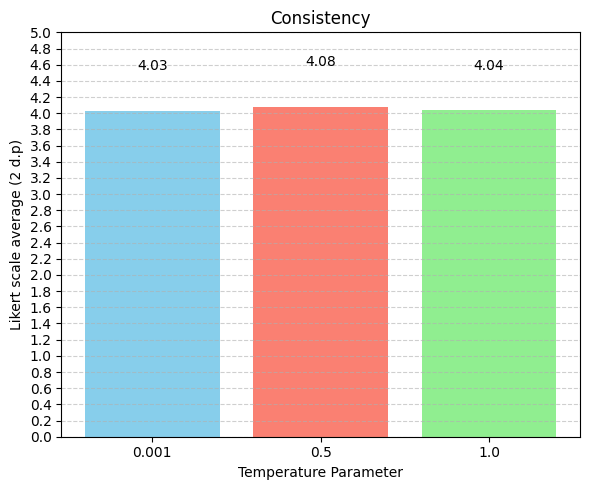

In [ ]:
#Third graph for Consistency question
# Frequency data
freq_df = pd.DataFrame({
    'Temperature': ['0.001', '0.5', '1.0'],
    'Count': [4.03,4.08,4.04]
})

# Plot frequency bar chart
plt.figure(figsize=(6, 5))
plt.bar(freq_df['Temperature'], freq_df['Count'], color=['skyblue', 'salmon', 'lightgreen'])

plt.title('Consistency')
plt.xlabel('Temperature Parameter')
plt.ylabel('Likert scale average (2 d.p)')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for index, value in enumerate(freq_df['Count']):
    plt.text(index, value + 0.5, str(value), ha='center')

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.2))
plt.tight_layout()
plt.show()

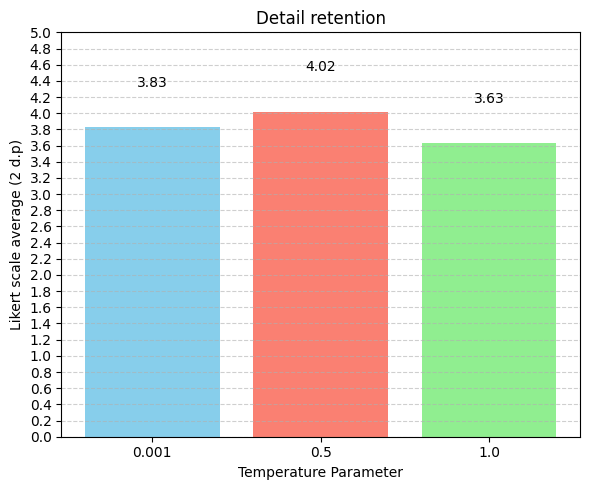

In [ ]:
#Fourth graph for Data retention question
# Frequency data


freq_df = pd.DataFrame({
    'Temperature': ['0.001', '0.5', '1.0'],
    'Count': [3.83, 4.02, 3.63]
})

# Plot frequency bar chart
plt.figure(figsize=(6, 5))
plt.bar(freq_df['Temperature'], freq_df['Count'], color=['skyblue', 'salmon', 'lightgreen'])

plt.title('Detail retention')
plt.xlabel('Temperature Parameter')
plt.ylabel('Likert scale average (2 d.p)')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for index, value in enumerate(freq_df['Count']):
    plt.text(index, value + 0.5, str(value), ha='center')

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.2))
plt.tight_layout()
plt.show()

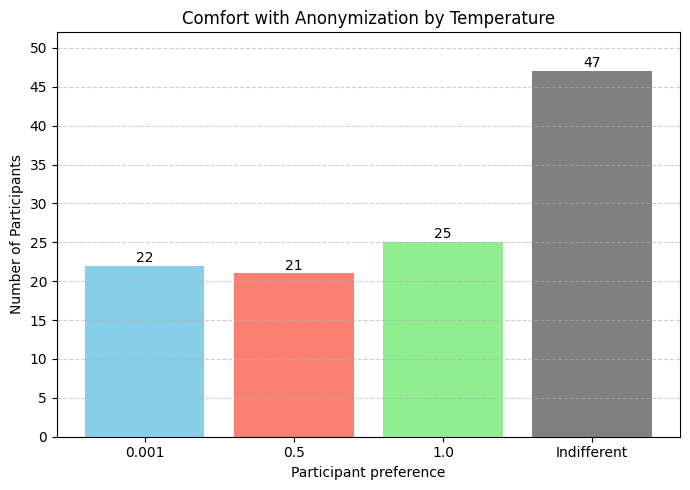

In [ ]:
#table for the last question


# Frequency data
freq_df = pd.DataFrame({
    'Temperature': ['0.001', '0.5', '1.0', 'Indifferent'],
    'Count': [22, 21, 25, 47]
})

# Plot frequency bar chart
plt.figure(figsize=(7, 5))
plt.bar(freq_df['Temperature'], freq_df['Count'], color=['skyblue', 'salmon', 'lightgreen', 'gray'])

plt.title('Comfort with Anonymization by Temperature')
plt.xlabel('Participant preference')
plt.ylabel('Number of Participants')
plt.ylim(0, max(freq_df['Count']) + 5)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for index, value in enumerate(freq_df['Count']):
    plt.text(index, value + 0.5, str(value), ha='center')

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(5))
plt.tight_layout()
plt.show()

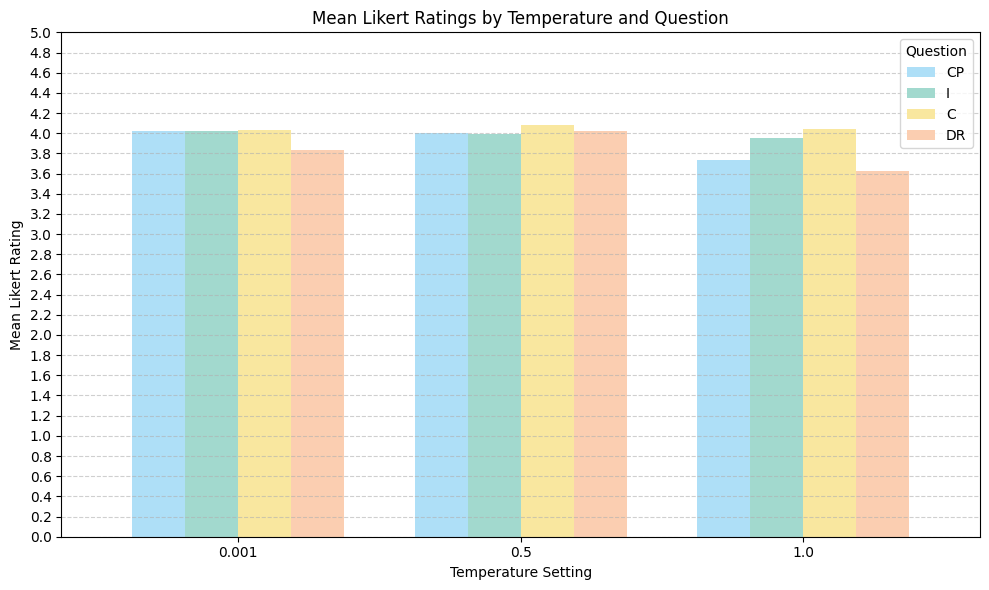

In [ ]:
#grouped frequency data

likert_data = {
    'X_CP_Avg': 4.02,
    'Y_CP_Avg': 4.00,
    'Z_CP_Avg': 3.73,
    'X_I_Avg': 4.02,
    'Y_I_Avg': 3.99,
    'Z_I_Avg': 3.95,
    'X_C_Avg': 4.03,
    'Y_C_Avg': 4.08,
    'Z_C_Avg': 4.04,
    'X_DR_Avg': 3.83,
    'Y_DR_Avg': 4.02,
    'Z_DR_Avg': 3.63
}

# Map temperature codes
temp_labels = {
    'X': '0.001',
    'Y': '0.5',
    'Z': '1.0'
}


# Convert to long-format DataFrame
df_likert = pd.DataFrame(likert_data.items(), columns=['Question_Temp', 'Mean'])
df_likert['Question'] = df_likert['Question_Temp'].apply(lambda x: x.split('_')[1])
df_likert['Temp'] = df_likert['Question_Temp'].apply(lambda x: x.split('_')[0])
df_likert['Temp'] = df_likert['Temp'].map(temp_labels)
df_likert.drop(columns='Question_Temp', inplace=True)

pivot_likert = df_likert.pivot(index='Temp', columns='Question', values='Mean')
pivot_likert = pivot_likert[['CP', 'I', 'C', 'DR']]

#colors
colors = ['#AEDFF7', '#A2D9CE', '#F9E79F', '#FBCEB1']  # light blue, green, yellow, orange

# Plot
pivot_likert.plot(kind='bar', figsize=(10, 6), width=0.75, color=colors)

plt.title('Mean Likert Ratings by Temperature and Question')
plt.xlabel('Temperature Setting')
plt.ylabel('Mean Likert Rating')
plt.ylim(0, 5)
plt.xticks(rotation=0)
plt.legend(title='Question')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.2))
plt.tight_layout()
plt.show()
